In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt


In [3]:
housing_data = pd.read_csv('housing.csv')

In [4]:
housing_data.dropna(axis=0,inplace=True)

housing_data.sample(10)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
6908     -118.12     34.04                35.0       1064.0           203.0   
7926     -118.09     33.84                23.0       4412.0           910.0   
18113    -122.02     37.31                34.0       2629.0           433.0   
8129     -118.17     33.80                26.0       1589.0           380.0   
6931     -118.08     34.01                33.0       1091.0           233.0   
5731     -118.21     34.16                25.0        434.0            74.0   
4977     -118.29     34.00                44.0       1753.0           387.0   
13402    -117.46     34.14                10.0        714.0           131.0   
20114    -120.47     37.96                25.0       2505.0           529.0   
14708    -117.06     32.80                17.0       2247.0           340.0   

       population  households  median_income  median_house_value  \
6908        608.0       201.0         4.0938            246900.0   
7926       2380.0       825.0         4.5400            213100.0   
18113      1301.0       431.0         6.0830            341400.0   
8129        883.0       366.0         3.5313            187500.0   
6931        890.0       226.0         2.7679            176400.0   
5731        199.0        75.0         5.9199            420500.0   
4977       1165.0       380.0         2.1354            105800.0   
13402       381.0       119.0         0.8926            116100.0   
20114      1145.0       483.0         2.0060            103000.0   
14708       973.0       318.0         5.5000            222000.0   

      ocean_proximity  
6908        <1H OCEAN  
7926        <1H OCEAN  
18113       <1H OCEAN  
8129       NEAR OCEAN  
6931        <1H OCEAN  
5731        <1H OCEAN  
4977        <1H OCEAN  
13402          INLAND  
20114          INLAND  
14708       <1H OCEAN

In [7]:
households_data = housing_data[['ocean_proximity','households']]

households_data.sample(10)

ocean_proximity  households
10026          INLAND       423.0
16006        NEAR BAY       284.0
11152       <1H OCEAN       500.0
13526          INLAND       420.0
17960       <1H OCEAN       405.0
6103        <1H OCEAN       656.0
14669      NEAR OCEAN       787.0
10000          INLAND       270.0
13668          INLAND       212.0
673          NEAR BAY       362.0

In [8]:
grouped_data = households_data.groupby('ocean_proximity', as_index=False).sum()

grouped_data.head()

ocean_proximity  households
0       <1H OCEAN   4674364.0
1          INLAND   3105133.0
2          ISLAND      1383.0
3        NEAR BAY   1106026.0
4      NEAR OCEAN   1318018.0

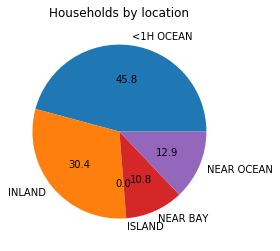

In [10]:
plt.pie(grouped_data['households'],
       labels=grouped_data['ocean_proximity'],
       autopct='%.1f')

plt.title('Households by location')
plt.show()

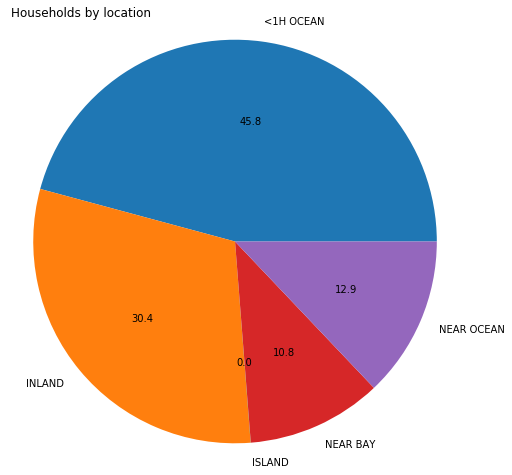

In [11]:
fig, ax = plt.subplots(figsize=(8,8))

plt.pie(grouped_data['households'],
       labels=grouped_data['ocean_proximity'],
       autopct='%.1f')

plt.title('Households by location',loc='left')
plt.axis('equal')
plt.show()

In [12]:
explode = (0,0,0,0,0.2)

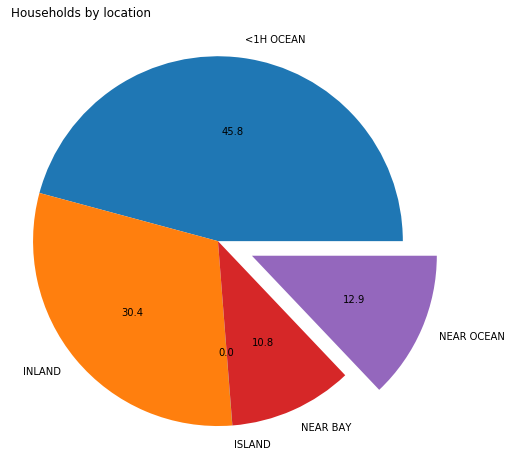

In [14]:
fig, ax = plt.subplots(figsize=(8,8))

plt.pie(grouped_data['households'],
       labels=grouped_data['ocean_proximity'],
       autopct='%.1f',
       explode=explode)

plt.title('Households by location',loc='left')
plt.axis('equal')
plt.show()

#### Autocorrelation, a series with itself,  used with time series to see if there are any periodic effects

In [16]:
grand_canyon_data = pd.read_csv('grand_canyon_visits.csv')

grand_canyon_data.head()

Month  NumVisits
0  2011-01     139029
1  2011-02     120726
2  2011-03     304583
3  2011-04     388363
4  2011-05     419569

In [18]:
grand_canyon_data['NumVisits'] = grand_canyon_data['NumVisits']/1000
grand_canyon_data['NumVisits'].describe()

count     84.000000
mean     426.022929
std      193.415223
min      120.726000
25%      252.250500
50%      417.966000
75%      580.652250
max      839.086000
Name: NumVisits, dtype: float64

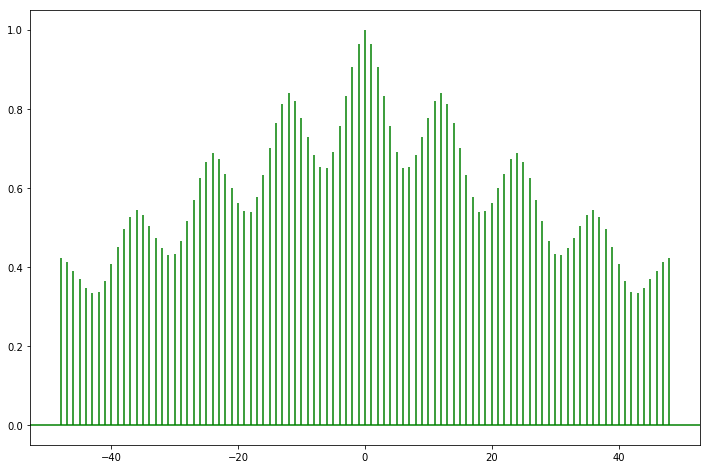

In [21]:
plt.figure(figsize=(12,8))

plt.acorr(grand_canyon_data['NumVisits'],
         maxlags=48,color='green')#accross 4 years
plt.show()

In [32]:
import numpy as np

In [33]:
np_data = pd.read_csv('national_parks.csv')
np_data.head()

Year  Badlands  GrandCanyon  BryceCanyon
0  1961    833300      1253000       264800
1  1962   1044800      1447400       251000
2  1963   1074000      1539500       289500
3  1964   1079800      1576600       300300
4  1965   1091300      1689200       366800

In [34]:
x = np_data['Year']

y = np.vstack([np_data['Badlands'],
               np_data['GrandCanyon'],
             np_data['BryceCanyon']])